# Bismillahir Rahmanir Rahim

In this particular notebook, we gonna learn about catagorical varibles and approaches to <br>
handle these. If you aren't familiar with catagirical variables before, learn from [here](https://www.tutorialspoint.com/python_pandas/python_pandas_categorical_data.htm)<br>
I would like to mention that, I am going the use the dataset from [Melbourne Housing Snapshot](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) <br>
This notebook is inspired from [Categorical Variables](https://www.kaggle.com/alexisbcook/categorical-variables)<br>
So, have a quick look there to learn about catagorical variable and relevant things which will be mentioned below.

Ok, let's start with what we've learned so far.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# data read
data = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

# this is the target, isolating it from dataset 
# so that this can't be in train/validation set
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [2]:
X_train_full.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12167,St Kilda,11/22 Charnwood Cr,1,u,S,hockingstuart,29/07/2017,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,Port Phillip,-37.85984,144.9867,Southern Metropolitan,13240.0
6524,Williamstown,18 James St,2,h,SA,Hunter,17/09/2016,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,Hobsons Bay,-37.85800,144.9005,Western Metropolitan,6380.0
8413,Sunshine,10 Dundalk St,3,h,S,Barry,8/04/2017,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,Brimbank,-37.79880,144.8220,Western Metropolitan,3755.0
2919,Glenroy,1/2 Prospect St,3,u,SP,Brad,18/06/2016,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,Moreland,-37.70830,144.9158,Northern Metropolitan,8870.0
6043,Sunshine North,35 Furlong Rd,3,h,S,First,22/05/2016,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,Brimbank,-37.76230,144.8272,Western Metropolitan,4217.0


In [3]:
# let's drop the missing value columns
missing_cols = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]
missing_cols

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

Dropping out columns having missing values

In [4]:
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
# number of columns in X_train_full
print(X_train_full.columns)
print(X_train_full.columns.size)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
16


Now, let's see the datatype of each column as we don't need **object** type(strings/texts actually) for our predictio in this example.

In [6]:
for col in X_train_full.columns:
    print(col, X_train_full[col].dtype)

Suburb object
Address object
Rooms int64
Type object
Method object
SellerG object
Date object
Distance float64
Postcode float64
Bedroom2 float64
Bathroom float64
Landsize float64
Lattitude float64
Longtitude float64
Regionname object
Propertycount float64


As we all know, to use *one-hot-encoding,* we must keep our columns in limit numbers and these column numbers will be determined from the unique values(dtype = **object**) in a column.<br>
Here comes the word **Cardinality** which means number of unique values in a column.<br>
So, we're gonna keep it low.

In [7]:
# keeping cardinality low
low_cardinality_cols = [col for col in X_train_full.columns if X_train_full[col].nunique() < 10 and X_train_full[col].dtype == 'object']
low_cardinality_cols

['Type', 'Method', 'Regionname']

In [8]:
for col in low_cardinality_cols:
    print(X_train_full[col].nunique())

3
5
8


Since there are total 3 + 5 + 8 = 16 unique entries for 3 catagorical columns, we'll have 16 columns for the catagorical variables.<br>
If you want to learn about nunique(), [Click here](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html)

As a part of our prediction process, we need numerical columns(not everything). Later we'll see the reason.

In [9]:
# keeping numerical cols
numerical_cols = [col for col in X_train_full.columns if X_train_full[col].dtype in ['int64', 'float64']]
numerical_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

let's merge these two columns(*low_cardinality_cols* and *numerical_cols*) as we don'tneed other columns for model use.

In [10]:
new_cols = low_cardinality_cols + numerical_cols
print(new_cols)
print(len(new_cols))

['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
12


See, we now have 12 columns only, which was 16 in previous.

In [11]:
# creating another dataset copied from X_train_full and X_valid_full
X_train = X_train_full[new_cols].copy()
X_valid = X_valid_full[new_cols].copy()

In [12]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


We can determine the data type of each columns of dataset, see below

In [13]:
# have a look the code below
X_train.dtypes == 'int64'

Type             False
Method           False
Regionname       False
Rooms             True
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Landsize         False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

In [14]:
X_train.dtypes == 'object'

Type              True
Method            True
Regionname        True
Rooms            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Landsize         False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

In [15]:
boools = (X_train.dtypes == 'object')
boools

Type              True
Method            True
Regionname        True
Rooms            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Landsize         False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

Here bools is called panda series, and type is: **<class 'pandas.core.series.Series'>**<br>
The line below, tells us that, these columns are 'object' type(texts)

In [16]:
boools[boools]

Type          True
Method        True
Regionname    True
dtype: bool

To know which columns have the dtype *object*,  we can use *.index*

In [17]:
boools[boools].index

Index(['Type', 'Method', 'Regionname'], dtype='object')

We saw how do we determine whether a column having a certain dtype and extract them in a list.<br>
We're gonna use this knowledge in our dataset.<br>
The next, let's determine the catagorical columns in this newly copied dataset.<br>

In [18]:
condition = (X_train.dtypes == 'object')
object_cols = list(condition[condition].index)

print("The catagorical variables:")
object_cols

The catagorical variables:


['Type', 'Method', 'Regionname']

We need to calculate mean_absolute_error for each of the approach of handling catagorical values. Let's define a function.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Calculaing MEA on our approaches

# **Approach 1:** Drop Categorical Variables<br>
We'll use [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to drop columns based on *object.*

In [20]:
# we'll be using select_dtype() 
X_train_dropped = X_train.select_dtypes(exclude = ['object'])
X_valid_dropped = X_valid.select_dtypes(exclude = ['object'])

In [21]:
print("MAE from Approach 1: Drop Categorical Variables")
print(score_dataset(X_train_dropped, X_valid_dropped, y_train, y_valid))

MAE from Approach 1: Drop Categorical Variables
175703.48185157913


Yaa! This is good to see a slight change in MAE with reduction.

# Approach 2: Ordinal Encoding

this is almost same approach as we did for SimpleImputer<br>
means, we'll first create a Ordinal Encoder and then fit it to out data and then<br>
transform it out. Learn more about OrdinalEncoder [click_here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# we'll use he copy of our dataset here
ord_enc_X_train = X_train.copy()
ord_enc_X_valid = X_valid.copy()

**Note:** Must be aware of your variables and their returning results! As in the *OrdinalEncounter(*) we're gonna get a pandas **dataFrame** which is why we do no necessarily need to use pd.DataFrame() as like we did for SimpleImputer in last *missing values* exercise.<br>
 So, we just worked with the particular columns(object_cols) only.

In [23]:
ordinal_encoder = OrdinalEncoder()
# let's apply ordinal encoder on specific columns having catagorical data
ordinal_encoder.fit(X_train[object_cols])
ord_enc_X_train[object_cols] = ordinal_encoder.transform(X_train[object_cols])
# we could have done with just .fit_trainsform() without writing 2 lines above.

ord_enc_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])
print(type(ord_enc_X_valid))
print("MAE from Approach 2: Ordinal Encoding")
print(score_dataset(ord_enc_X_train, ord_enc_X_valid, y_train, y_valid))

<class 'pandas.core.frame.DataFrame'>
MAE from Approach 2: Ordinal Encoding
165936.40548390493


Well, there can be another encoder called **LabelEncoder()** to be used in place of *OrdinalEncoder()*<br>
Btw, we got a slight change in error and which is good.

# Approach 3: One-Hot Encoding

We're gonna use OneHotEncoder from *scikit-learn.preprocessing*. As we know that the One-Hot-Encoding approach is always prividing<br>
a sparse format, then the parameter **Sparse** is by default *True*. Learn more about One-Hot-Encoding from official site [click_here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)<br>
We know that OneHotEncoder() is looks like 
> class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')

Here the parameter handle_unknown raises an error by default if we have any unknown categorical feature in our model dataset while testing time.<br>
For example.  if we have a BuiltYear for a car called Ford in 2009 found while testing our model, but we do not actually have any specific information about this car while training(thus it's an unknown catagory!).<br>
So. this  *handle_unknown* will promt an error  by default. However, we're just keeping it ignored as it doesn't require here.
Again, we're not using sparse format here, so we'll keep it as **False**.<br>
**Note:** Here OneHotEncoder transforms into a numpy array insted of a dataFrame, so we need to use a df here.

In [24]:
from sklearn.preprocessing import OneHotEncoder

# let's define a one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
one_hot_encoder.fit(X_train[object_cols])
one_hot_cols_train = pd.DataFrame(one_hot_encoder.transform(X_train[object_cols]))
one_hot_cols_valid = pd.DataFrame(one_hot_encoder.transform(X_valid[object_cols]))

In [25]:
# see how it looks now
one_hot_cols_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Though, we're observing an extra column *(left most)* as index, but it's just a simple serial/order created by default.<br>

melbourne-housing-snapshot  one-hot-cols-train-image1


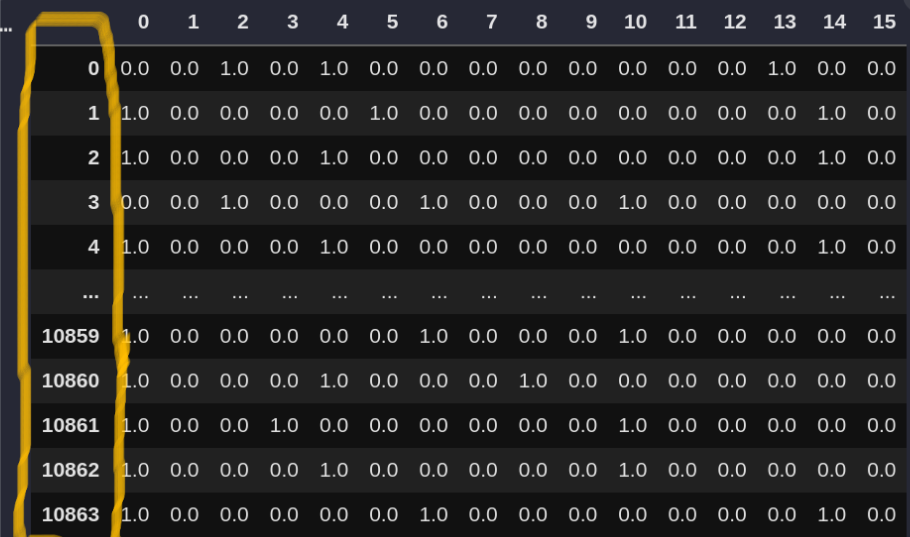

In [26]:
from IPython.display import Image
import os
!ls ../input/
Image('../input/one-hot-cols-train-image1/Screenshot from 2021-08-17 16-51-28.png')

As the index has been removed, let's put it back

In [27]:
one_hot_cols_train.index = X_train.index
one_hot_cols_valid.index = X_valid.index

In [28]:
one_hot_cols_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
12167,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3264,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now, we can see the actual index of the dataframe. We'll need index as we're gonna concate this dataframe with our original dataset at that particular index.<br>
So, without further due,let's see!<br>
First, we're gonna remove the catagorical columns from the main dataset(X_train and X_valid), as we have the necessary informations (already worked with diffrerent approaches on catagorical data).

In [29]:
final_X_train = X_train.drop(object_cols, axis = 1)
final_X_valid = X_valid.drop(object_cols, axis = 1)

In [30]:
# let's see how it looks
final_X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


Next, we're gonna **concatenate** this above dataframe with one_hot dataframe at the particular indices.

In [31]:
one_hot_X_train = pd.concat([final_X_train, one_hot_cols_train], axis = 1)
one_hot_X_valid = pd.concat([final_X_valid, one_hot_cols_valid], axis = 1)

In [32]:
# see the update here
one_hot_X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,0,...,6,7,8,9,10,11,12,13,14,15
12167,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


See! We have **25 columns**, which is a big!!! This is why we do not use OneHot while there is chance of having many uniques values in catagorical columns.<br>
Though, we had taken only the  catagorical coumns containing less than 10 unique catagories.<br>
Last thing ramaining is the MAE calculation. So let's do that.

In [33]:
print("MAE from Approach 3: One Hot Encoding")

print(score_dataset(one_hot_X_train, one_hot_X_valid, y_train, y_valid))

MAE from Approach 3: One Hot Encoding
166089.4893009678


# Can you guess which one performs the best? 
Normally, **Approach 1** is the *worst* one, and **Approach 3** performs *best* among these three approaches.<br>
However, this may vary upon the problem.<br>
Note: We could have used get_dummies in terms of onehot here with pandas to shorten our code. [See here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)<br>
So, we conclude that, Approach 2 performs best in this particular problem.